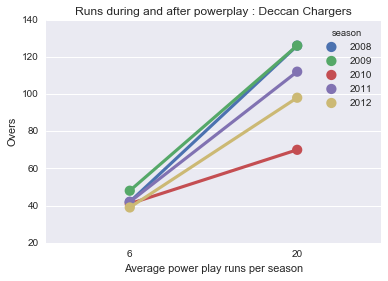

In [8]:
import numpy as np
from datetime import datetime
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("--Team", help="provide a search term, latitude, longitude and radius")
#parser.add_argument("--location", help="provide a search term, latitude, longitude and radius")
args = parser.parse_args()
batting_team = args.Team
dict_1 = {}
dict_2 = {}
batting_team = 'Deccan Chargers'
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
appended_data = []
for g in  x :
    df1 = pd.read_csv(g)
    if batting_team in df1.batting_team.unique() : 
        df2 = priliminary_analysis(df1, batting_team)
        appended_data.append(df2)
appended_data = pd.concat(appended_data, axis=0)
appended_data.set_index(['season'] )
appended_data
df3 = appended_data.loc[6]
df4 = appended_data.loc[20]
#store each in a CSV and then Plo
df1 = appended_data.reset_index(drop = False)
df1 = df1[np.isfinite(df1['runs_according_to_powerplay'])]
ax = sns.pointplot(x="over", y="runs_according_to_powerplay", hue="season",
                    data=df1)
ax.set(xlabel = 'Average power play runs per season' , ylabel = 'Overs' , title = 'Runs during and after powerplay : ' + batting_team)
plt.savefig('foo4.png')

In [1]:
def priliminary_analysis(s_8, batting_team) :
    s_10 = 0
    s_11 = 0
    s_8 = s_8[s_8['dl_applied']==0]
    s_8 = s_8.set_index(['batting_team'] , drop = False)
    s_8 = s_8[s_8['batting_team'] == batting_team]
    s_8 = s_8.set_index(['over'] , drop = False)
    s_9 = s_8.set_index(['over'] , drop = False)
    x = len(s_8.match_id.unique())
    a = s_9.over.unique().tolist()
    for k in a[:6] :
        s_10 = s_10 + round(sum(s_8[s_8['over']==k]['batsman_runs'])/x) #+ round(sum(s_8[s_8['over']==k+ 1]['batsman_runs'])/x) + round(sum(s_8[s_8['over']==k +2 ]['batsman_runs'])/x) + round(sum(s_8[s_8['over']==k+3]['batsman_runs'])/x)+round(sum(s_8[s_8['over']==k+4]['batsman_runs'])/x)
        s_9.loc[6,'runs_according_to_powerplay'] = s_10  
        #dict_3[j] = [sum(z[:5]) , sum(z[5:10]) , sum(z[10:15]) , sum(z[15:20])
    for j in a[6:] :
        s_11 = s_11 + round(sum(s_8[s_8['over']==k]['batsman_runs'])/x) #+ round(sum(s_8[s_8['over']==k+ 1]['batsman_runs'])/x) + round(sum(s_8[s_8['over']==k +2 ]['batsman_runs'])/x) + round(sum(s_8[s_8['over']==k+3]['batsman_runs'])/x)+round(sum(s_8[s_8['over']==k+4]['batsman_runs'])/x)
        s_9.loc[20,'runs_according_to_powerplay'] = s_11  
    s_9 = s_9[s_9['runs_according_to_powerplay']!=0]
    s_9 = s_9[['season','runs_according_to_powerplay']].drop_duplicates()
    return(s_9)
#Arrange the combined file into seasons, divide the file into different season, use the abpve function and try to plot. Link : http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html